In [20]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

## The Data

DATA SOURCE: https://www.kaggle.com/rikdifos/credit-card-approval-prediction

Data Information:

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

Feature Information:

<table>
<thead>
<tr>
<th>application_record.csv</th>
<th></th>
<th></th>
</tr>
</thead>
<tbody>
<tr>
<td>Feature name</td>
<td>Explanation</td>
<td>Remarks</td>
</tr>
<tr>
<td><code>ID</code></td>
<td>Client number</td>
<td></td>
</tr>
<tr>
<td><code>CODE_GENDER</code></td>
<td>Gender</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_OWN_CAR</code></td>
<td>Is there a car</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_OWN_REALTY</code></td>
<td>Is there a property</td>
<td></td>
</tr>
<tr>
<td><code>CNT_CHILDREN</code></td>
<td>Number of children</td>
<td></td>
</tr>
<tr>
<td><code>AMT_INCOME_TOTAL</code></td>
<td>Annual income</td>
<td></td>
</tr>
<tr>
<td><code>NAME_INCOME_TYPE</code></td>
<td>Income category</td>
<td></td>
</tr>
<tr>
<td><code>NAME_EDUCATION_TYPE</code></td>
<td>Education level</td>
<td></td>
</tr>
<tr>
<td><code>NAME_FAMILY_STATUS</code></td>
<td>Marital status</td>
<td></td>
</tr>
<tr>
<td><code>NAME_HOUSING_TYPE</code></td>
<td>Way of living</td>
<td></td>
</tr>
<tr>
<td><code>DAYS_BIRTH</code></td>
<td>Birthday</td>
<td>Count backwards from current day (0), -1 means yesterday</td>
</tr>
<tr>
<td><code>DAYS_EMPLOYED</code></td>
<td>Start date  of employment</td>
<td>Count backwards from current day(0). If  positive, it means the person currently unemployed.</td>
</tr>
<tr>
<td><code>FLAG_MOBIL</code></td>
<td>Is there a mobile   phone</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_WORK_PHONE</code></td>
<td>Is there a work phone</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_PHONE</code></td>
<td>Is there a phone</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_EMAIL</code></td>
<td>Is there an email</td>
<td></td>
</tr>
<tr>
<td><code>OCCUPATION_TYPE</code></td>
<td>Occupation</td>
<td></td>
</tr>
<tr>
<td><code>CNT_FAM_MEMBERS</code></td>
<td>Family size</td>
<td></td>
</tr>
</tbody>
</table>

In [2]:
df = pd.read_csv('application_record.csv')

In [3]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [10]:
df.shape

(438557, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
import warnings

In [7]:
warnings.simplefilter('ignore')

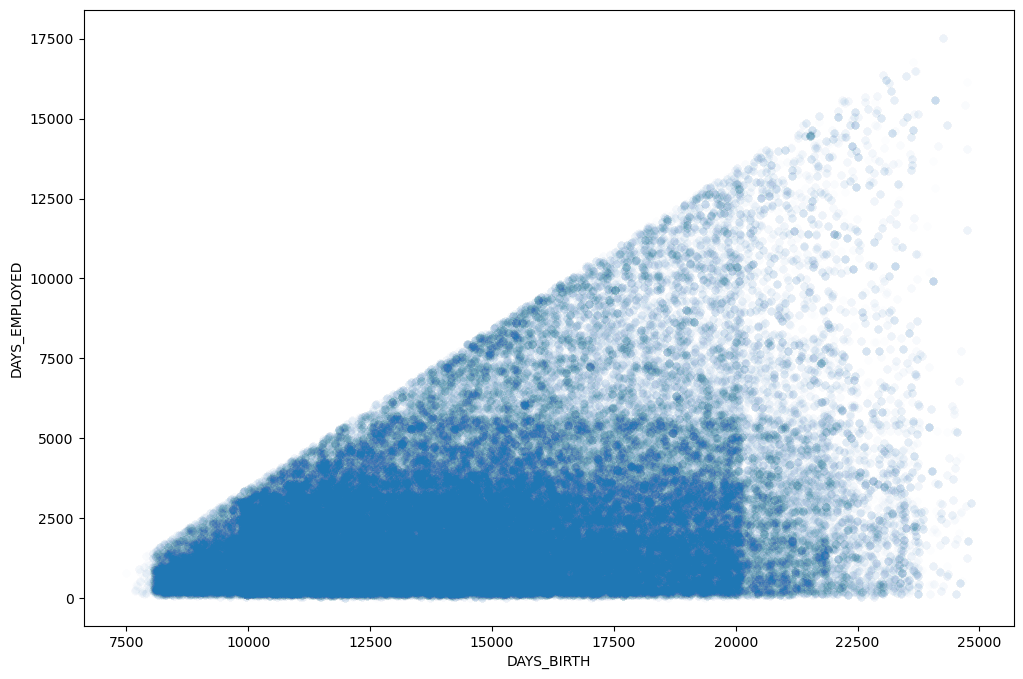

In [8]:
plt.figure(figsize=(12,8))

# REMOVE UNEMPLOYED PEOPLE
employed = df[df['DAYS_EMPLOYED']<0]

# MAKE BOTH POSITIVE
employed['DAYS_EMPLOYED'] = -1*employed['DAYS_EMPLOYED']
employed['DAYS_BIRTH'] = -1*employed['DAYS_BIRTH']

# With so many points, alpha is tiny, might be an indicated that a 
# scatterplot may not be the right choice!
sns.scatterplot(y='DAYS_EMPLOYED',x='DAYS_BIRTH',data=employed,
                alpha=0.01,linewidth=0)

plt.savefig('ScatterPlot.jpg')

In [12]:
employed.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,363228.0,6.022768e+06,570499.440418,5008804.0,5617529.75,6047768.5,6448705.25,7999952.0
CNT_CHILDREN,363228.0,5.074829e-01,0.764181,0.0,0.00,0.0,1.00,19.0
AMT_INCOME_TOTAL,363228.0,1.945939e+05,114168.559505,27000.0,135000.00,180000.0,225000.00,6750000.0
DAYS_BIRTH,363228.0,1.481216e+04,3501.319668,7489.0,11938.00,14580.0,17455.00,24834.0
DAYS_EMPLOYED,363228.0,2.623053e+03,2399.514253,12.0,915.00,1924.0,3512.00,17531.0
FLAG_MOBIL,363228.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
FLAG_WORK_PHONE,363228.0,2.488822e-01,0.432366,0.0,0.00,0.0,0.00,1.0
FLAG_PHONE,363228.0,2.866354e-01,0.452190,0.0,0.00,0.0,1.00,1.0
FLAG_EMAIL,363228.0,1.188152e-01,0.323571,0.0,0.00,0.0,0.00,1.0
CNT_FAM_MEMBERS,363228.0,2.290503e+00,0.926890,1.0,2.00,2.0,3.00,20.0


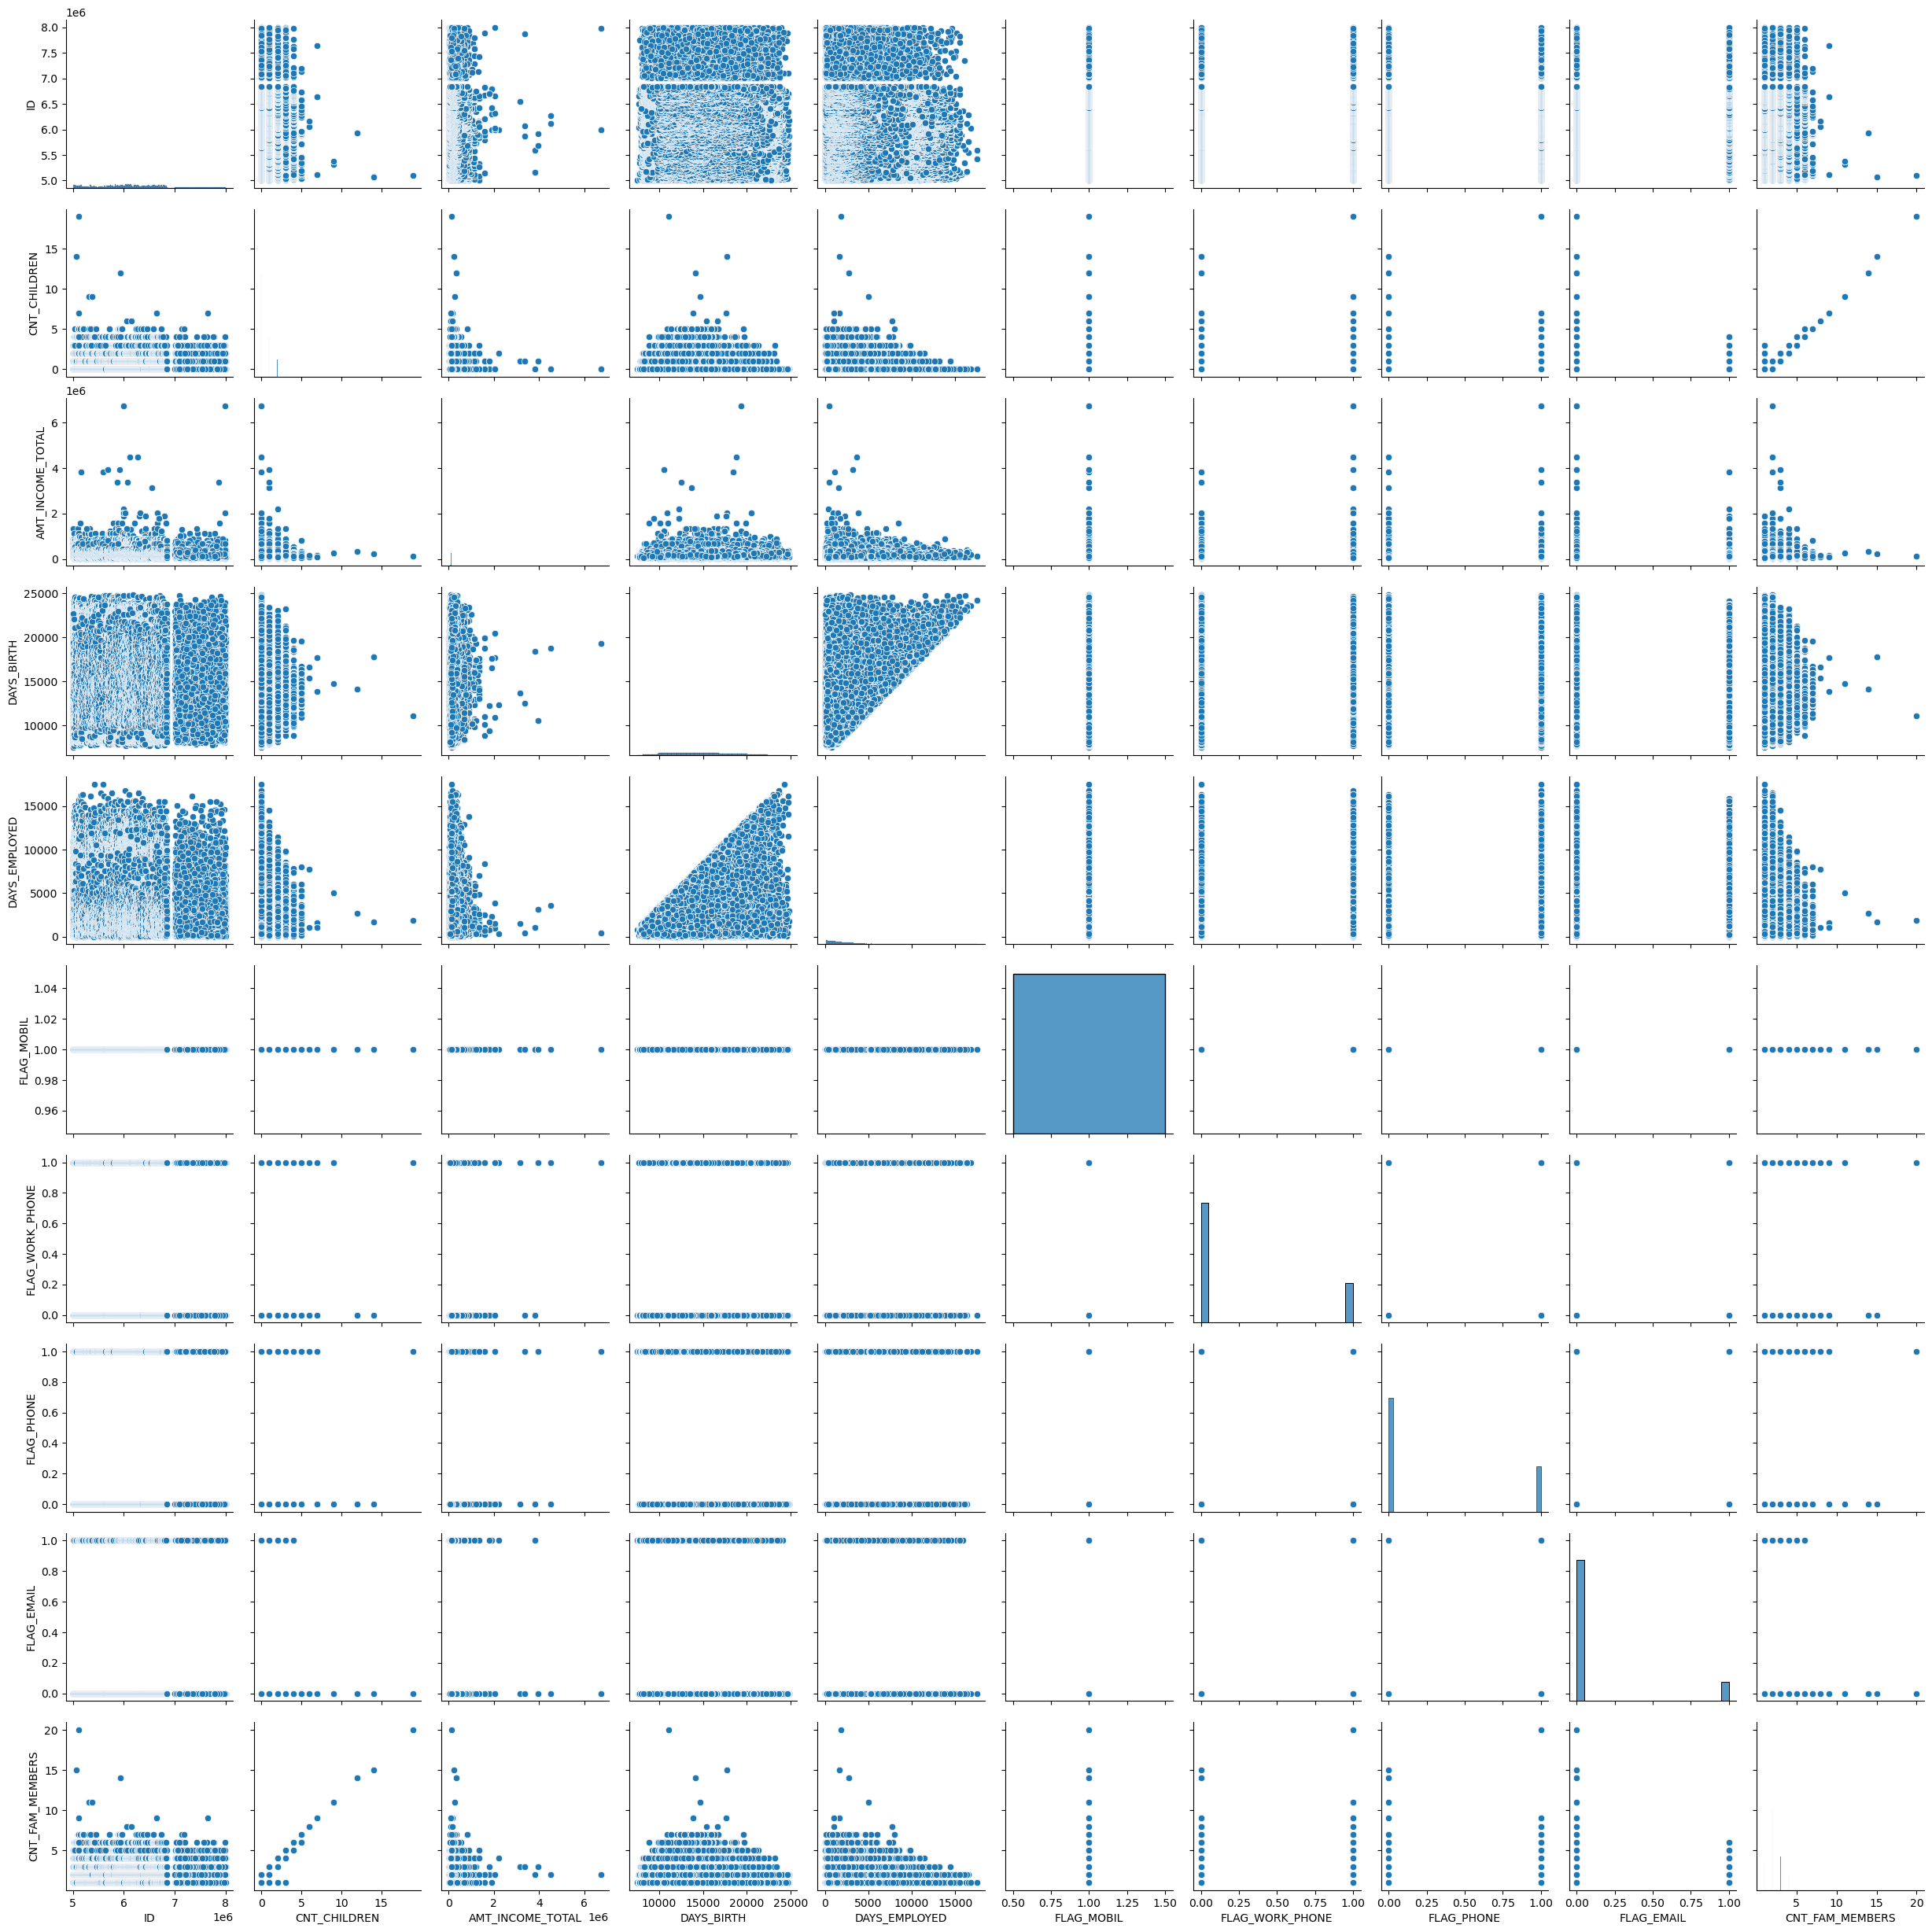

In [13]:
sns.pairplot(employed)

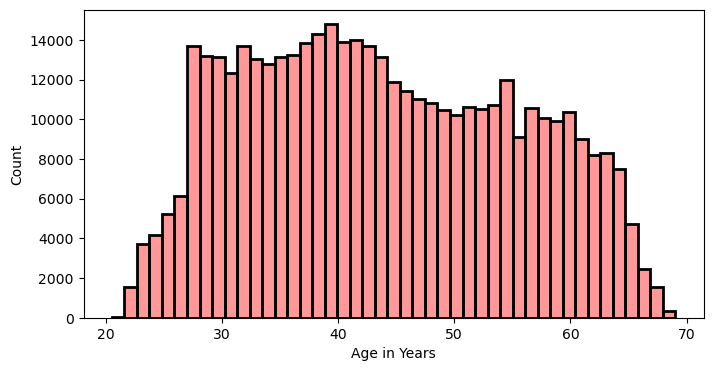

In [14]:
plt.figure(figsize=(8,4))

df['YEARS'] = -1*df['DAYS_BIRTH']/365
sns.histplot(data=df,x='YEARS',linewidth=2,edgecolor='black',
             color='red',bins=45,alpha=0.4)
plt.xlabel("Age in Years")
plt.savefig('DistPlot.png')

Text(0.5, 1.0, 'Income Totals per Family Status for Bottom Half of Earners')

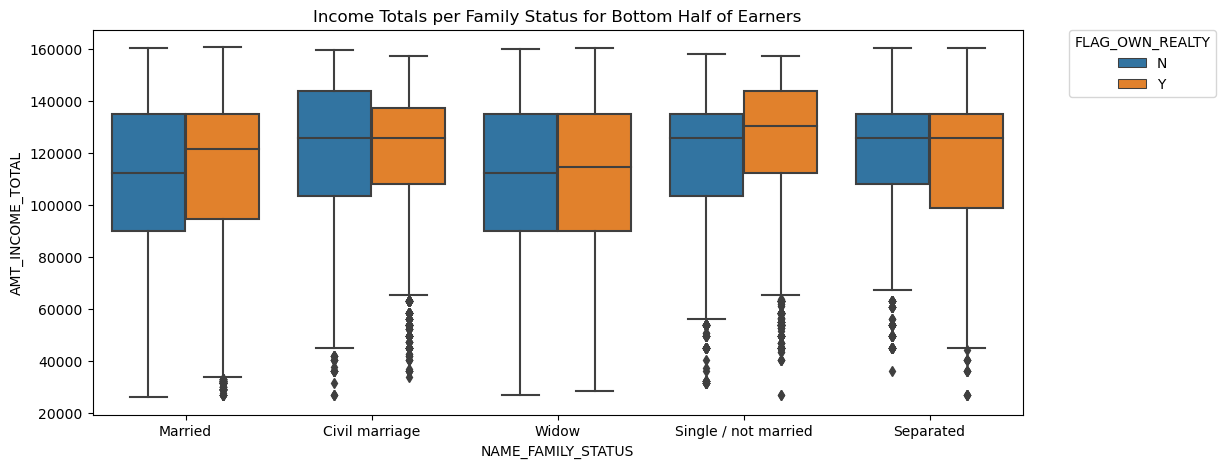

In [15]:
plt.figure(figsize=(12,5))

bottom_half_income = df.nsmallest(n=int(0.5*len(df)),columns='AMT_INCOME_TOTAL')
sns.boxplot(x='NAME_FAMILY_STATUS',y='AMT_INCOME_TOTAL',data=bottom_half_income,hue='FLAG_OWN_REALTY')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='FLAG_OWN_REALTY')
plt.title('Income Totals per Family Status for Bottom Half of Earners')


In [17]:
# df.corr()
numeric_df = df.select_dtypes(include=['number'])

numeric_df.corr()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,YEARS
ID,1.000000,-0.005178,0.011179,-0.004994,-0.002467,NaN,-0.023319,-0.018992,0.032875,-0.001862,0.004994
CNT_CHILDREN,-0.005178,1.000000,0.019177,0.349088,-0.241535,NaN,0.038418,-0.038266,0.028457,0.884781,-0.349088
AMT_INCOME_TOTAL,0.011179,0.019177,1.000000,0.053775,-0.141291,NaN,-0.033635,0.004444,0.112139,0.011454,-0.053775
DAYS_BIRTH,-0.004994,0.349088,0.053775,1.000000,-0.617908,NaN,0.171829,-0.037984,0.096752,0.306179,-1.000000
DAYS_EMPLOYED,-0.002467,-0.241535,-0.141291,-0.617908,1.000000,NaN,-0.232208,0.004868,-0.074372,-0.234373,0.617908
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,-0.023319,0.038418,-0.033635,0.171829,-0.232208,NaN,1.000000,0.290066,-0.060915,0.049777,-0.171829
FLAG_PHONE,-0.018992,-0.038266,0.004444,-0.037984,0.004868,NaN,0.290066,1.000000,-0.001170,-0.024213,0.037984
FLAG_EMAIL,0.032875,0.028457,0.112139,0.096752,-0.074372,NaN,-0.060915,-0.001170,1.000000,0.022054,-0.096752
CNT_FAM_MEMBERS,-0.001862,0.884781,0.011454,0.306179,-0.234373,NaN,0.049777,-0.024213,0.022054,1.000000,-0.306179


<Axes: >

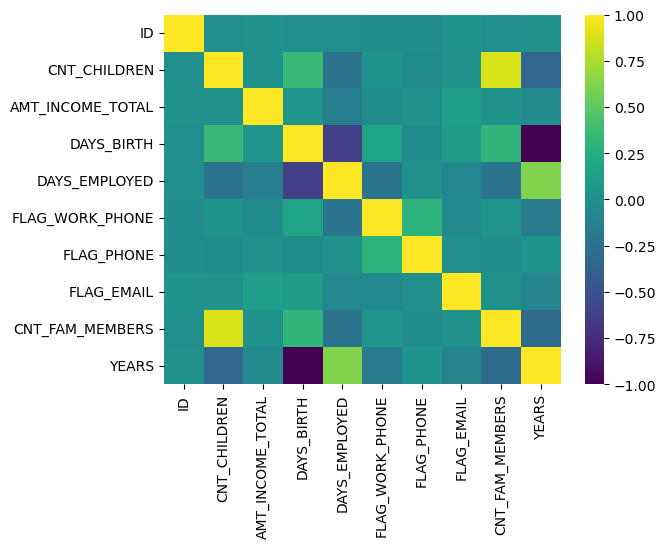

In [19]:
# sns.heatmap(df.drop('FLAG_MOBIL',axis=1).corr(),cmap="viridis")
sns.heatmap(numeric_df.drop('FLAG_MOBIL',axis=1).corr(),cmap="viridis")